In [4]:
import csv
import copy
import pandas as pd
from pandas import Series, DataFrame
import os
from io import TextIOWrapper
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile, ZIP_DEFLATED
import seaborn as sns

In [5]:
a = r'C:\Users\ziyi Su\aae718'
os.chdir(a)
os.getcwd()

'C:\\Users\\ziyi Su\\aae718'

In [6]:
df = pd.read_csv('Methane_final.csv')
df

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...,...
1543,1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...
1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [9]:
region_sum = df[(df['region'] != 'World') & (df['type'] == 'Agriculture')]['emissions'].sum()
region_sum

150805.10314442962

In [10]:
world_sum = df[(df['region'] == 'World') & (df['type'] == 'Agriculture')]['emissions']
world_sum

1526    141953.765625
Name: emissions, dtype: float64

In [11]:
delta = region_sum - world_sum
delta

1526    8851.337519
Name: emissions, dtype: float64

In [12]:
subset = df[(df['region'] != 'World') & (df['type'] == 'Agriculture')]
unique = np.array(subset['segment'].unique())
print(unique)

['Total']


In [13]:
averages = df.groupby('region')['emissions'].mean().reset_index()   
averages.columns = ['region', 'average_emissions']
averages

,region,average_emissions
0,Africa,133.490524
1,Asia Pacific,658.146709
2,Central and South America,249.398851
3,Europe,162.943698
4,Middle East,203.720849
5,North America,1038.482118
6,Other,761.778913
7,Russia & Caspian,650.225129
8,World,22234.196225


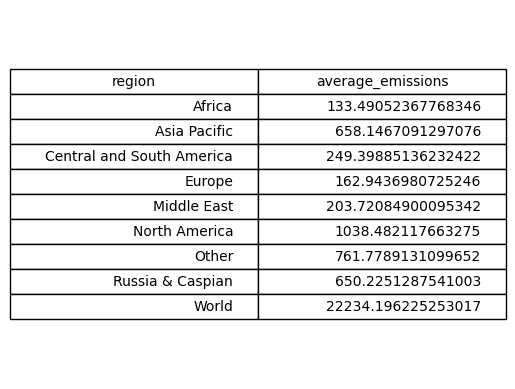

In [14]:
fig, ax = plt.subplots(1, 1)
table_data = []
for row in averages.itertuples(index=False):
    table_data.append(row)
table = ax.table(cellText=table_data, colLabels=averages.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
ax.axis('off')
plt.savefig("hwk3_plot1.png")

In [15]:
 df[(df['region'] != 'World') & (df['type'] == 'Agriculture')]

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
15,Africa,Angola,400.969574,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
31,Africa,Benin,105.691032,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
40,Africa,Botswana,97.258492,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
49,Africa,Cameroon,279.531219,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
...,...,...,...,...,...,...,...,...
1430,Russia & Caspian,Azerbaijan,195.197525,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1448,Russia & Caspian,Kazakhstan,762.098083,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1470,Russia & Caspian,Russia,2022.095947,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1492,Russia & Caspian,Turkmenistan,304.871765,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [16]:
average = df[df['segment'] != 'Total'].groupby('region')['emissions'].mean().reset_index()
average.columns = ['region', 'average_emissions']
average

,region,average_emissions
0,Africa,50.257345
1,Asia Pacific,202.039250
2,Central and South America,54.245650
3,Europe,29.923815
4,Middle East,117.053323
5,North America,426.517513
6,Other,142.404710
7,Russia & Caspian,350.827066
8,World,7408.387889


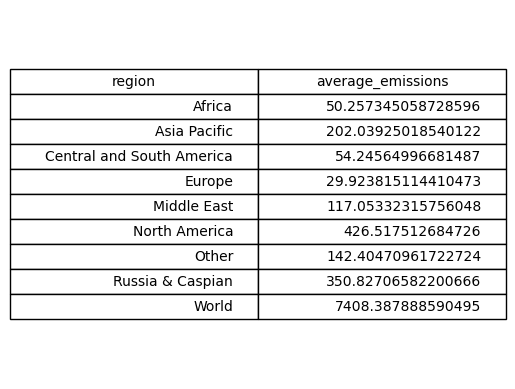

In [17]:
fig, ax = plt.subplots(1, 1)
table_data = []
for row in average.itertuples(index=False):
    table_data.append(row)
table = ax.table(cellText=table_data, colLabels=average.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
ax.axis('off')
plt.savefig("hwk3_plot2.png")

In [18]:
sums = df.groupby('region')['emissions'].sum().reset_index()   
sums.columns = ['region', 'emissions']
sums

,region,emissions
0,Africa,54197.152613
1,Asia Pacific,177699.611465
2,Central and South America,45639.989799
3,Europe,49208.996818
4,Middle East,38095.798763
5,North America,63347.409177
6,Other,15997.357175
7,Russia & Caspian,62421.612360
8,World,489152.316956


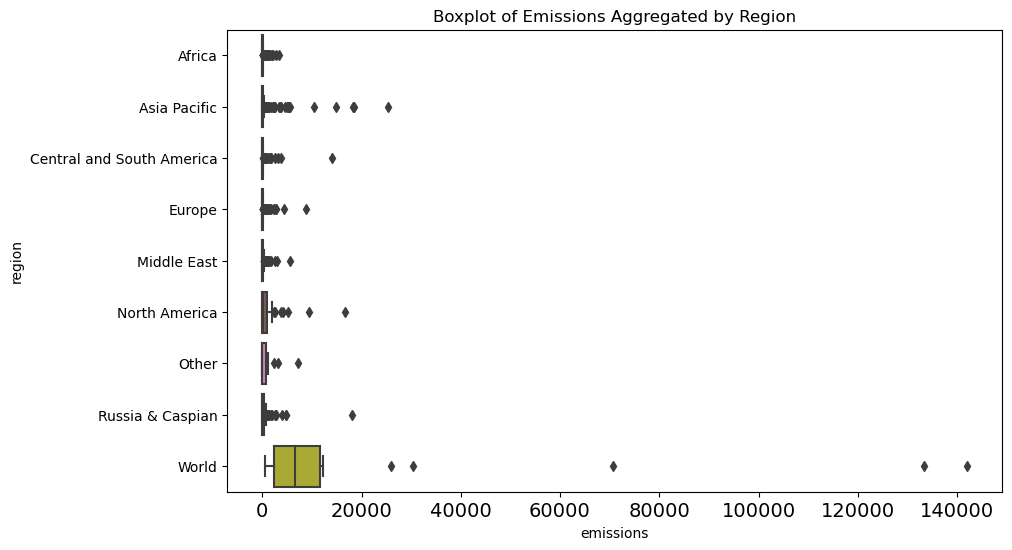

In [19]:
#p6

#df['region'] = df['region'].astype('category')
#df['segment'] = df['segment'].astype('category')

    # 1. Aggregated by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='emissions', y='region', data=df)
plt.tick_params(axis='x', labelsize=14)
plt.title('Boxplot of Emissions Aggregated by Region')
plt.savefig('boxplot1.png')
plt.show()
plt.close()

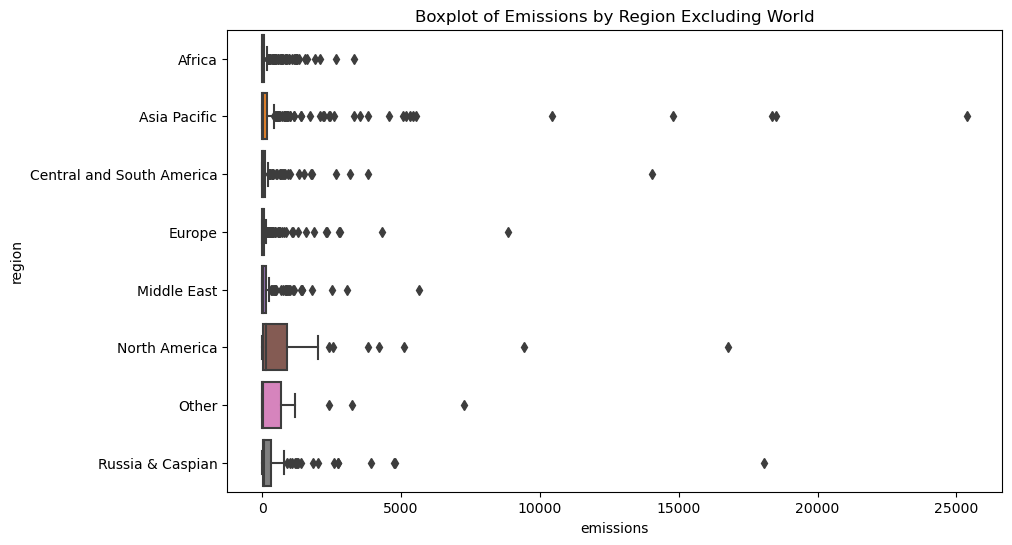

In [20]:
df_no_world = df[df['region'] != 'World']
plt.figure(figsize=(10, 6))
sns.boxplot(x='emissions', y='region', data=df_no_world)
plt.title('Boxplot of Emissions by Region Excluding World')
plt.savefig('boxplot2.png')
plt.show()
plt.close()

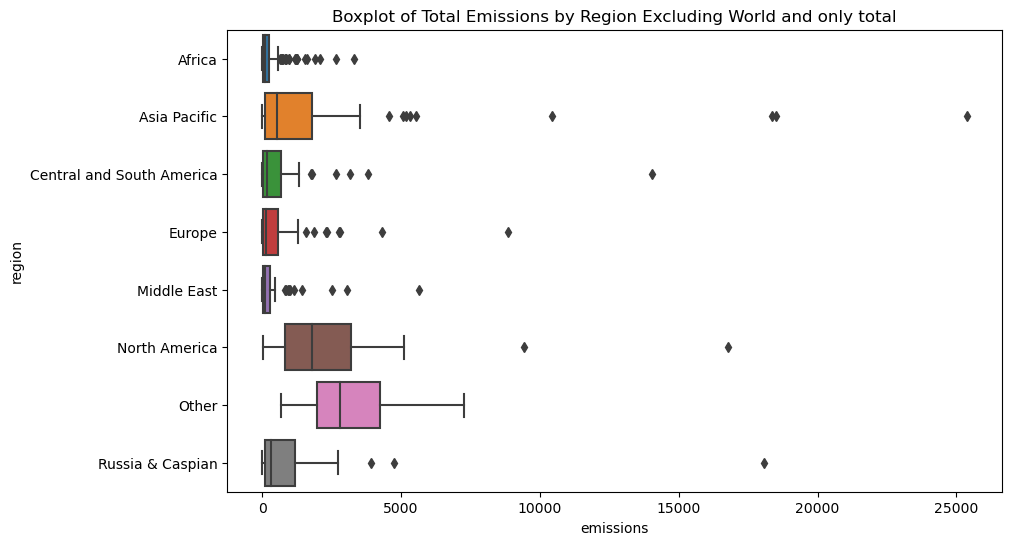

<function matplotlib.pyplot.close(fig=None)>

In [21]:
df_total = df_no_world[df_no_world['segment'] == 'Total']
plt.figure(figsize=(10, 6))
sns.boxplot(x='emissions', y='region', data=df_total)
plt.title('Boxplot of Total Emissions by Region Excluding World and only total')
plt.savefig('boxplot3.png')
plt.show()
plt.close

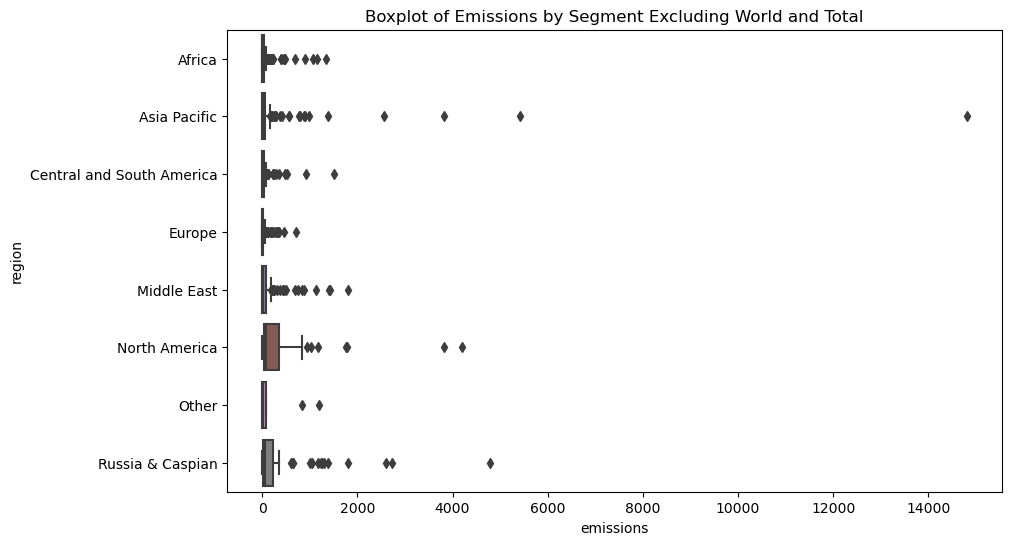

In [22]:
df_no_world_total = df_no_world[df_no_world['segment'] != 'Total']
plt.figure(figsize=(10, 6))
sns.boxplot(x='emissions', y='region', data=df_no_world_total)
plt.title('Boxplot of Emissions by Segment Excluding World and Total')
plt.savefig('boxplot4.png')
plt.show()
plt.close()

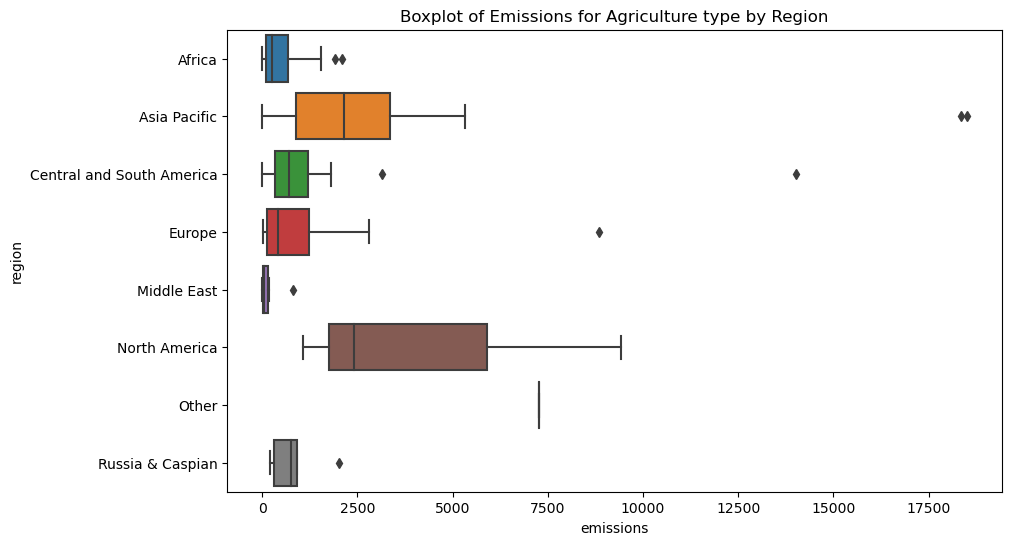

In [23]:
df_agriculture = df_no_world[df_no_world['type'] == 'Agriculture']
plt.figure(figsize=(10, 6))
sns.boxplot(x='emissions', y='region', data=df_agriculture)
plt.title('Boxplot of Emissions for Agriculture type by Region')
plt.savefig('boxplot5.png')
plt.show()
plt.close()

In [24]:
path = r'C:\Users\ziyi Su\aae718\Animal_Crossing.zip'
#os.chdir(a)

In [25]:
inner = 'Animal_Crossing'
csv_file = 'accessories.csv'
with ZipFile(path, 'r') as zf:
    file_path = f'{inner}/{csv_file}'
    #les = os.listdir(file_path)
    #iles
    with zf.open(file_path) as f:
        rd = pd.read_csv(f)
rd

,Name,Variation,DIY,Buy,Sell,Color 1,Color 2,Size,Miles Price,Source,...,Mannequin Piece,Version,Style,Label Themes,Type,Villager Equippable,Catalog,Filename,Internal ID,Unique Entry ID
0,3D glasses,White,No,490,122,White,Colorful,1x1,NaN,Able Sisters,...,No,1.0.0,Active,party,AccessoryEye,Yes,For sale,AccessoryGlassThreed0,4463,FNxEraBTeWRiCvtFu
1,3D glasses,Black,No,490,122,Black,Colorful,1x1,NaN,Able Sisters,...,No,1.0.0,Active,party,AccessoryEye,Yes,For sale,AccessoryGlassThreed1,11020,mM9SXPCcGPfPJAmtm
2,bandage,Beige,No,140,35,Beige,White,1x1,NaN,Able Sisters,...,Yes,1.0.0,Active,outdoorsy; comfy; sporty,AccessoryMouth,No,For sale,AccessoryMouthBandageSkin,4677,2qFT5iPkk8bREvpkj
3,beak,Yellow,No,490,122,Yellow,Yellow,1x1,NaN,Able Sisters,...,Yes,1.0.0,Cute,fairy tale; party; theatrical,AccessoryMouthInvisibleNose,No,For sale,AccessoryMouthBeakYellow,3549,T5CpsJi4xBSachNL5
4,birthday shades,Yellow,No,NFS,620,Yellow,Red,1x1,NaN,Birthday,...,No,1.0.0,Gorgeous,party,AccessoryEye,Yes,Not for sale,AccessoryGlassBirthday0,4510,S6CiB9ZvzBTMhEnDz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,triangle shades,Green,No,880,220,Green,Purple,1x1,NaN,Able Sisters,...,No,1.0.0,Cute,party; vacation,AccessoryEye,Yes,For sale,AccessoryGlassTriangle4,11206,4edkdodmNhmpkSCBo
218,triangle shades,White,No,880,220,White,Purple,1x1,NaN,Able Sisters,...,No,1.0.0,Cute,party; vacation,AccessoryEye,Yes,For sale,AccessoryGlassTriangle5,11207,QpAQQTRoBmcjNBeEK
219,triangle shades,Black,No,880,220,Black,Purple,1x1,NaN,Able Sisters,...,No,1.0.0,Cute,party; vacation,AccessoryEye,Yes,For sale,AccessoryGlassTriangle6,11208,vGHab8KFNDFRgW5h6
220,wooden-frame glasses,Brown,No,1560,390,Brown,Gray,1x1,NaN,Able Sisters,...,Yes,1.0.0,Simple,everyday; formal; work,AccessoryEye,Yes,For sale,AccessoryGlassWood0,4669,dbnqry4vZBvK6LrS2


In [26]:
rd['Sell'].sort_values(ascending=[False])

120    2000
45     1010
44     1010
32      800
31      800
       ... 
46       35
64       35
2        35
22       35
180      10
Name: Sell, Length: 222, dtype: int64

In [27]:
a = rd['Sell'].sort_values(ascending=[False]).index[0]
assert rd['Sell'].sort_values(ascending=[False]).iloc[0] != rd['Sell'].sort_values(ascending=[False]).iloc[1]

In [28]:
result = rd['Name'].iloc[a]
result

'Nook Inc. eye mask'

In [29]:
b = {}
for i in range(len(rd)):
    try:
        c = int(rd.iloc[i]['Buy']) - int(rd.iloc[i]['Sell'])
        b[i] = c
    except ValueError:
        continue

In [30]:
b

{0: 368,
 1: 368,
 2: 105,
 3: 368,
 8: 825,
 9: 825,
 10: 825,
 11: 825,
 12: 825,
 13: 825,
 14: 825,
 15: 780,
 16: 780,
 17: 780,
 18: 780,
 19: 105,
 20: 105,
 21: 105,
 22: 105,
 23: 105,
 24: 420,
 25: 420,
 26: 420,
 27: 780,
 28: 780,
 29: 780,
 33: 420,
 34: 420,
 35: 420,
 36: 368,
 37: 525,
 38: 975,
 39: 975,
 40: 975,
 41: 975,
 42: 975,
 43: 975,
 46: 105,
 47: 420,
 48: 420,
 49: 420,
 50: 825,
 51: 825,
 52: 825,
 53: 825,
 54: 420,
 55: 420,
 56: 420,
 57: 420,
 58: 420,
 59: 420,
 60: 420,
 61: 420,
 62: 420,
 63: 420,
 64: 105,
 65: 420,
 66: 368,
 67: 578,
 68: 578,
 69: 578,
 70: 578,
 71: 578,
 72: 368,
 73: 825,
 74: 825,
 75: 825,
 76: 825,
 77: 825,
 78: 825,
 79: 735,
 80: 420,
 81: 420,
 82: 420,
 83: 420,
 84: 420,
 85: 420,
 86: 840,
 87: 780,
 88: 780,
 89: 780,
 90: 780,
 91: 780,
 92: 1500,
 93: 1320,
 94: 1320,
 95: 1320,
 96: 1320,
 97: 1500,
 98: 1500,
 99: 1500,
 100: 1500,
 101: 1500,
 102: 1500,
 103: 660,
 104: 660,
 105: 660,
 106: 660,
 107: 66

In [31]:
mi = int(rd['Sell'].sort_values(ascending=[False]).iloc[0])
for i in b:
    if b[i] < mi:
        mi = b[i]
        number = i
number

2

In [32]:
list1 = []
list1.append(number)
for i in b:
    if b[i] == b[number]:
        if i != number:
            list1.append(i)

In [33]:
list1

[2, 19, 20, 21, 22, 23, 46, 64]

In [34]:
result = []
for i in list1:
    if rd.iloc[i]['Name'] not in result:
        result.append(rd.iloc[i]['Name'])

In [35]:
result

['bandage', 'bubblegum', "doctor's mask", 'eye patch']